# Part A. ANOVA

Additional Material: ANOVA tutorial

https://datascienceplus.com/one-way-anova-in-r/

Jet lag is a common problem for people traveling across multiple time zones, but people can gradually adjust to the new time zone since the exposure of the shifted light schedule to their eyes can resets the internal circadian rhythm in a process called “phase shift”. Campbell and Murphy (1998) in a highly controversial study reported that the human circadian clock can also be reset by only exposing the back of the knee to light, with some hailing this as a major discovery and others challenging aspects of the experimental design. The table below is taken from a later experiment by Wright and Czeisler (2002) that re-examined the phenomenon. The new experiment measured circadian rhythm through the daily cycle of melatonin production in 22 subjects randomly assigned to one of three light treatments. Subjects were woken from sleep and for three hours were exposed to bright lights applied to the eyes only, to the knees only or to neither (control group). The effects of treatment to the circadian rhythm were measured two days later by the magnitude of phase shift (measured in hours) in each subject’s daily cycle of melatonin production. A negative measurement indicates a delay in melatonin production, a predicted effect of light treatment, while a positive number indicates an advance.

Raw data of phase shift, in hours, for the circadian rhythm experiment

|Treatment|Phase Shift (hr)                            |
|:--------|:-------------------------------------------|
|Control  |0.53, 0.36, 0.20, -0.37, -0.60, -0.64, -0.68, -1.27|
|Knees    |0.73, 0.31, 0.03, -0.29, -0.56, -0.96, -1.61       |
|Eyes     |-0.78, -0.86, -1.35, -1.48, -1.52, -2.04, -2.83    |

## Question A1 - 3 pts

Consider the following incomplete R output:

|Source|Df |Sum of Squares|Mean Squares|F-statistics|p-value|
|:----:|:-:|:------------:|:----------:|:----------:|:-----:|
|Treatments|?|?|3.6122|?|0.004|
|Error|?|9.415|?| | |
|TOTAL|?|?| | | |

Fill in the missing values in the analysis of the variance table.Note: Missing values can be calculated using the corresponding formulas provided in the lectures, or you can build the data frame in R and generate the ANOVA table using the aov() function. Either approach will be accepted.

In [1]:
library(reshape2)
library(dplyr)
Control = c(0.53, 0.36, 0.2, -0.37,-0.6, -0.64,-0.68,-1.27)
Knees = c(0.73, 0.31, 0.03, -0.29, -0.56, -0.96, -1.61, NA)
Eyes = c(-0.78, -0.86, -1.35, -1.48, -1.52, -2.04, -2.83, NA)
data = data.frame(cbind(Control,Knees, Eyes))%>%melt()
colnames(data) = c('Treatment', 'Phase Shift(hr)')
print(data)

print('ANOVA Table')
model = aov(data$`Phase Shift(hr)`~data$Treatment)
print(summary(model))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

No id variables; using all as measure variables


   Treatment Phase Shift(hr)
1    Control            0.53
2    Control            0.36
3    Control            0.20
4    Control           -0.37
5    Control           -0.60
6    Control           -0.64
7    Control           -0.68
8    Control           -1.27
9      Knees            0.73
10     Knees            0.31
11     Knees            0.03
12     Knees           -0.29
13     Knees           -0.56
14     Knees           -0.96
15     Knees           -1.61
16     Knees              NA
17      Eyes           -0.78
18      Eyes           -0.86
19      Eyes           -1.35
20      Eyes           -1.48
21      Eyes           -1.52
22      Eyes           -2.04
23      Eyes           -2.83
24      Eyes              NA
[1] "ANOVA Table"
               Df Sum Sq Mean Sq F value  Pr(>F)   
data$Treatment  2  7.224   3.612   7.289 0.00447 **
Residuals      19  9.415   0.496                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
2 observations deleted due to miss

## Question A2 - 3 pts

Use $\mu_1$, $\mu_2$, and $\mu_3$  as notation for the three mean parameters and define these parameters clearly based on the context of the topic above(i.e. explain what  $\mu_1$, $\mu_2$, and $\mu_3$ mean in words in the context of this problem). Find the estimates of these parameters.

In [2]:
model.tables(model, type="mean")

Tables of means
Grand mean
           
-0.7127273 

 data$Treatment 
    Control   Knees   Eyes
    -0.3088 -0.3357 -1.551
rep  8.0000  7.0000  7.000

𝜇1 , 𝜇2, and 𝜇3 are the means in phase shift of the control, knees, and eyes groups, respectively.

## Question A3 - 5 pts

Use the ANOVA table in Question A1 to answer the following questions:

a. **1 pts** Write the null hypothesis of the ANOVA $F$-test, $H_0$

$H_0$: 𝜇1 = 𝜇2 = 𝜇3


b. **1 pts** Write the alternative hypothesis of the ANOVA $F$-test, $H_A$

$H_A$: means are different


c. **1 pts** Fill in the blanks for the degrees of freedom of the ANOVA $F$-test statistic:   $F(____, _____)$

F(2,19)

d. **1 pts** What is the p-value of the ANOVA $F$-test?

0.00447

e. **1 pts** According the the results of the ANOVA $F$-test, does light treatment affect phase shift?  Use an $\alpha$-level of 0.05.

Yes it does, shown by p-value of the ANOVA F-test being less than 0.05.


# Part B. Simple Linear Regression

We are going to use regression analysis to estimate the performance of CPUs based on the maximum number of channels in the CPU.  This data set comes from the UCI Machine Learning Repository.

The data file includes the following columns:

* *vendor*: vendor of the CPU
* *chmax*: maximum channels in the CPU
* *performance*: published relative performance of the CPU

The data is in the file "machine.csv". To read the data in `R`, save the file in your working directory (make sure you have changed the directory if different from the R working directory) and read the data using the `R` function `read.csv()`.

In [3]:
# Read in the data
data = read.csv("machine.csv", head = TRUE, sep = ",")
# Show the first few rows of data
head(data, 3)

vendor,chmax,performance
adviser,128,198
amdahl,32,269
amdahl,32,220


## Question B1: Exploratory Data Analysis - 9 pts

a. **3 pts** Use a scatter plot to describe the relationship between CPU performance and the maximum number of channels. Describe the general trend (direction and form). Include plots and R-code used.

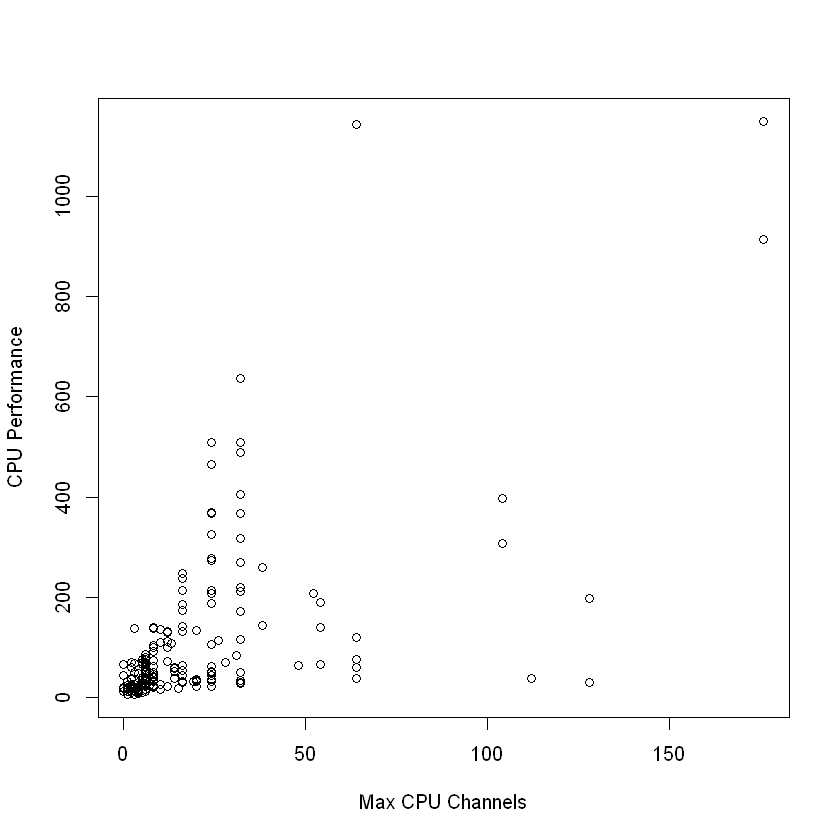

In [4]:
plot(data[,2], data[,3], xlab = 'Max CPU Channels', ylab = 'CPU Performance')

Appears to be a positive correlation between number of CPU channels and CPU performance

b. **3 pts** What is the value of the correlation coefficient between _performance_ and _chmax_? Please interpret the strength of the correlation based on the correlation coefficient.

In [5]:
cor(data[,2], data[,3])

[1] 0.6052093

Correlation of 0.61 would be a positive moderate correlation.

c. **2 pts** Based on this exploratory analysis, would you recommend a simple linear regression model for the relationship?

Based on the analysis above, a linear regresion model is reasonable and would be recommended.

d. **1 pts** Based on the analysis above, would you pursue a transformation of the data? *Do not transform the data.*

Based solely on the analysis above, I wouldn't pursue a transformation of the data.

## Question B2: Fitting the Simple Linear Regression Model - 11 pts

Fit a linear regression model, named *model1*, to evaluate the relationship between performance and the maximum number of channels. *Do not transform the data.* The function you should use in R is:

In [6]:
# Your code here...
model1 = lm(performance ~ chmax, data)

summary(model1)


Call:
lm(formula = performance ~ chmax, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-486.47  -42.20  -22.20   20.31  867.15 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2252    10.8587   3.428 0.000733 ***
chmax         3.7441     0.3423  10.938  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 128.3 on 207 degrees of freedom
Multiple R-squared:  0.3663,	Adjusted R-squared:  0.3632 
F-statistic: 119.6 on 1 and 207 DF,  p-value: < 2.2e-16


a. **3 pts** What are the model parameters and what are their estimates? 

Parameters: B0 = 37.2252 , B1 = 3.7441

b. **2 pts** Write down the estimated simple linear regression equation.

y = 3.7441(x) + 37.2252. x: cpu channels, y: cpu performance

c. **2 pts** Interpret the estimated value of the $\beta_1$ parameter in the context of the problem.

B1 is the increased value per unit increase. AKA CPU performance increases 3.7441 per additional CPU channel

d. **2 pts** Find a 95% confidence interval for the $\beta_1$ parameter. Is $\beta_1$ statistically significant at this level?

In [7]:
confint (model1, level = 0.95)

,2.5 %,97.5 %
(Intercept),15.817392,58.633048
chmax,3.069251,4.418926


As seen above, confidence interval for B1 is [3.069251, 4.418926], which is statistically significant

e. **2 pts** Is $\beta_1$ statistically significantly positive at an $\alpha$-level of 0.01?  What is the approximate p-value of this test?

B1 is statistically significant. P-value is very small at 1e^-16

## Question B3: Checking the Assumptions of the Model - 8 pts

Create and interpret the following graphs with respect to the assumptions of the linear regression model. In other words, comment on whether there are any apparent departures from the assumptions of the linear regression model. Make sure that you state the model assumptions and assess each one.  Each graph may be used to assess one or more model assumptions.

a. **2 pts** Scatterplot of the data with *chmax* on the x-axis and *performance* on the y-axis

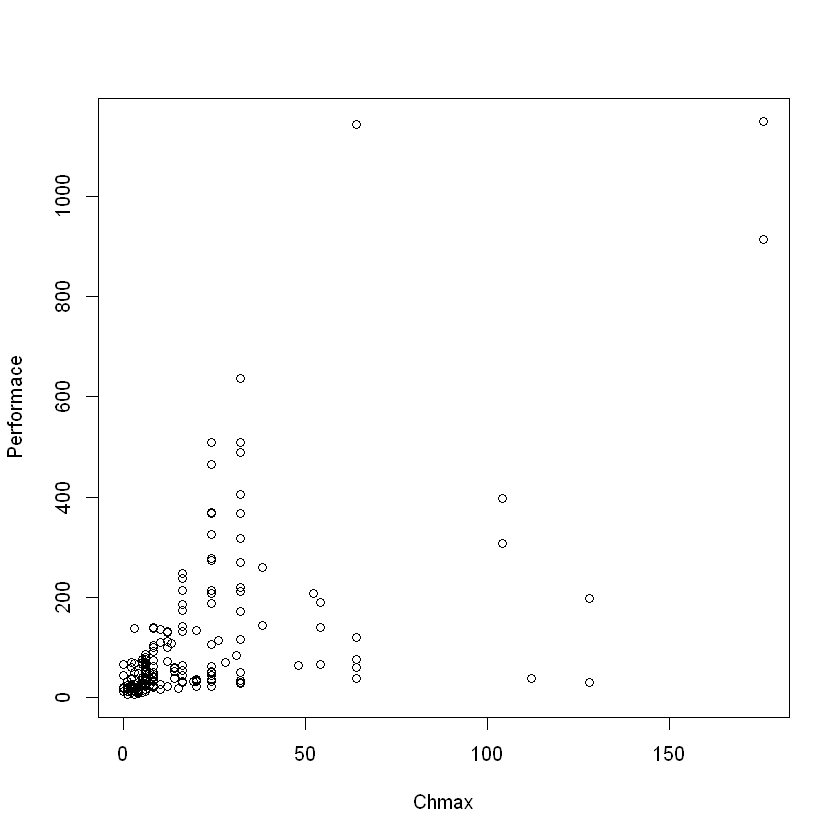

In [8]:
plot(data[,2], data[,3], xlab="Chmax", ylab= "Performace")

**Model Assumption(s) it checks:** linearity

**Interpretation:** No departures from above assumptions as it's the same graph

b. **3 pts** Residual plot - a plot of the residuals, $\hat\epsilon_i$, versus the fitted values, $\hat{y}_i$

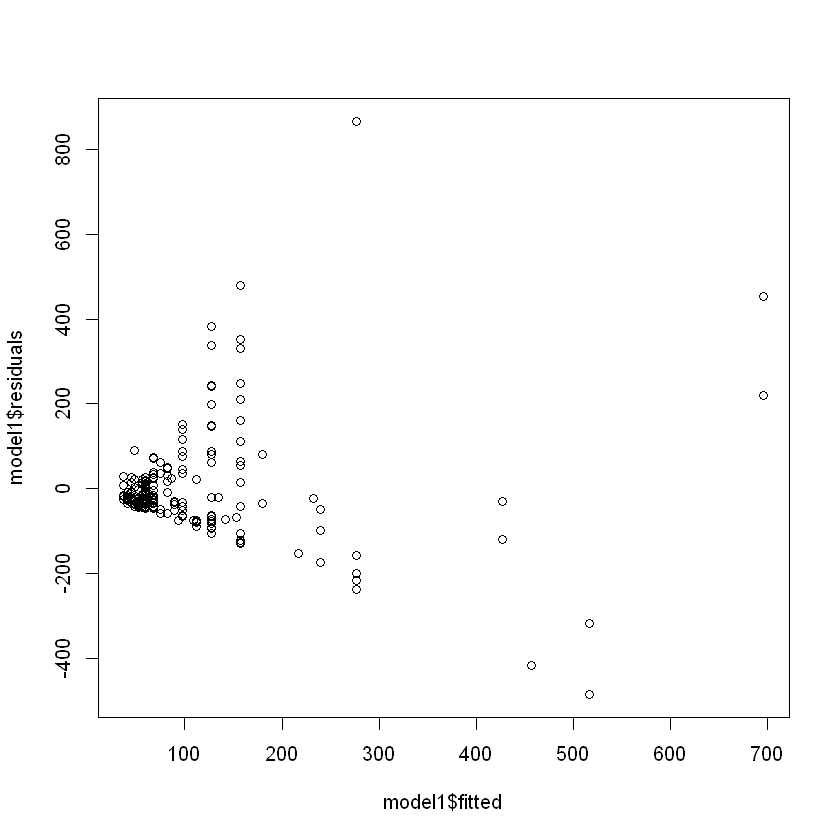

In [9]:
plot(model1$fitted, model1$residuals)

**Model Assumption(s) it checks:** Variance

**Interpretation:** Points don't appear too random so a linear model may be a bad fit, but some randomness does appear to be present?

c. **3 pts** Histogram and q-q plot of the residuals

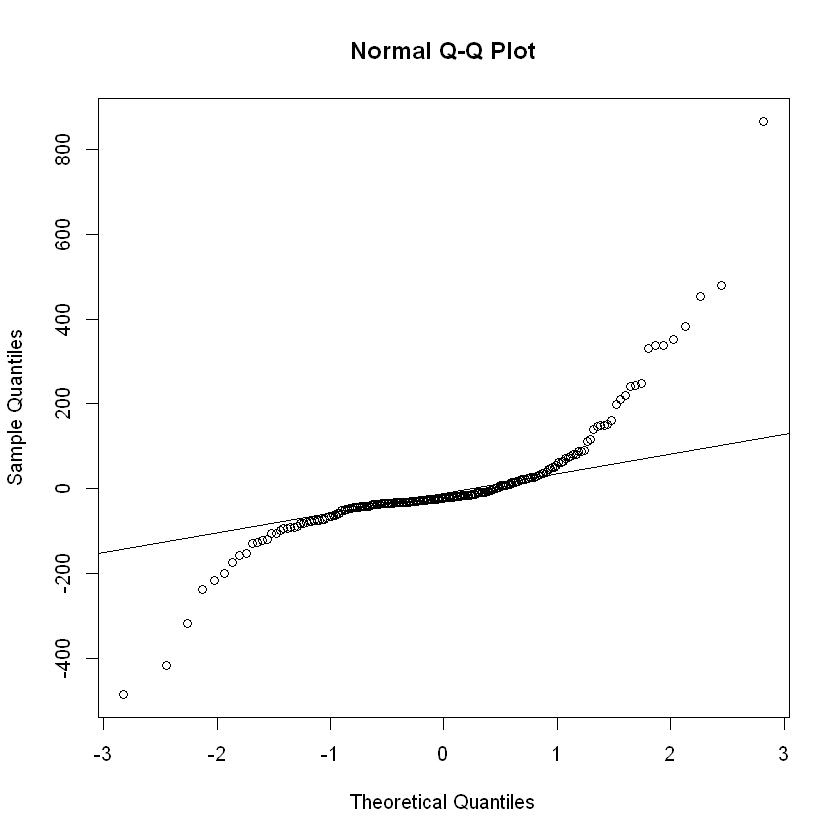

In [10]:
qqnorm(model1$residuals)
qqline(model1$residuals)

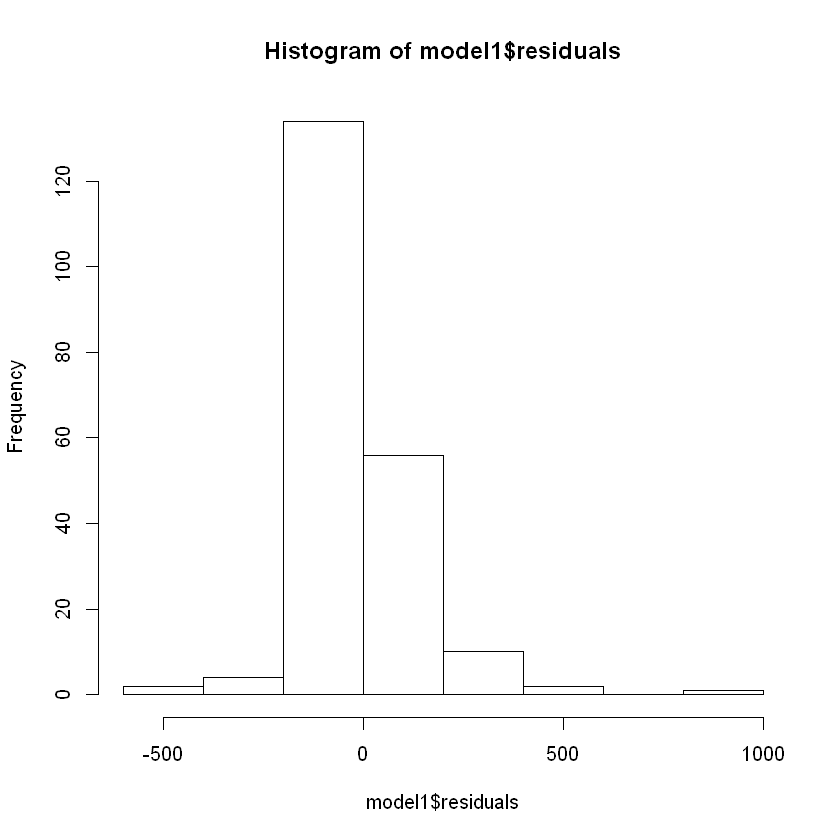

In [11]:
hist(model1$residuals)

**Model Assumption(s) it checks:** Normal distribution

**Interpretation:** Tails stray from line which indicates they're not normally distributed

## Question B4: Improving the Fit - 10 pts

a. **2 pts** Use a Box-Cox transformation (`boxCox()`) in `car()` package or (`boxCox()`) in `MASS()` package) to find the optimal $\lambda$ value rounded to the nearest half integer.  What transformation of the response, if any, does it suggest to perform?

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



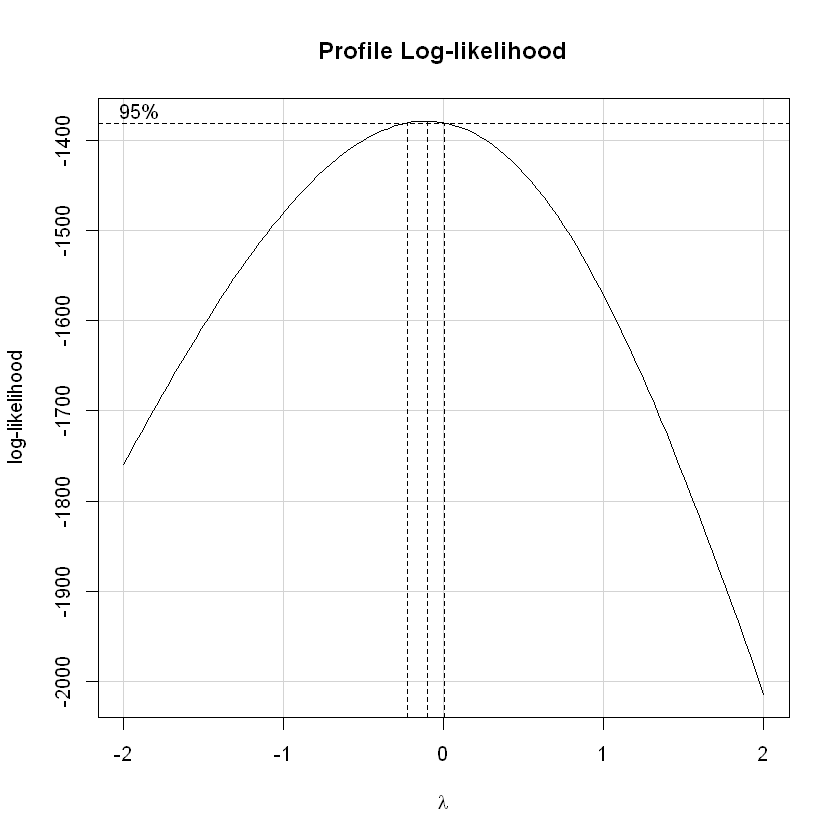

In [12]:
library(car)
y = data[,3]
x = data[,2]
boxCox(y~x, lambda = seq(-2,2,0.5))

lambda is near 0, indicating a log transformation be performed

b. **2 pts** Create a linear regression model, named *model2*, that uses the log transformed *performance* as the response, and the log transformed *chmax* as the predictor. Note: The variable *chmax* has a couple of zero values which will cause problems when taking the natural log. Please add one to the predictor before taking the natural log of it

In [13]:
data$chmax = data$chmax+1
model2 = lm(log(performance) ~ log(chmax), data)
summary(model2)


Call:
lm(formula = log(performance) ~ log(chmax), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22543 -0.59429  0.01065  0.59287  1.85995 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.47655    0.14152    17.5   <2e-16 ***
log(chmax)   0.64819    0.05401    12.0   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.807 on 207 degrees of freedom
Multiple R-squared:  0.4103,	Adjusted R-squared:  0.4074 
F-statistic:   144 on 1 and 207 DF,  p-value: < 2.2e-16


c. **2 pts** Compare the R-squared values of *model1* and *model2*.  Did the transformation improve the explanatory power of the model?

The transformation improved the explanatory power of the model, seen by in the increase by ~0.05 in the R-squared value

d. **4 pts** Similar to Question B3, assess and interpret all model assumptions of *model2*.  A model is considered a good fit if all assumptions hold. Based on your interpretation of the model assumptions, is *model2* a good fit?

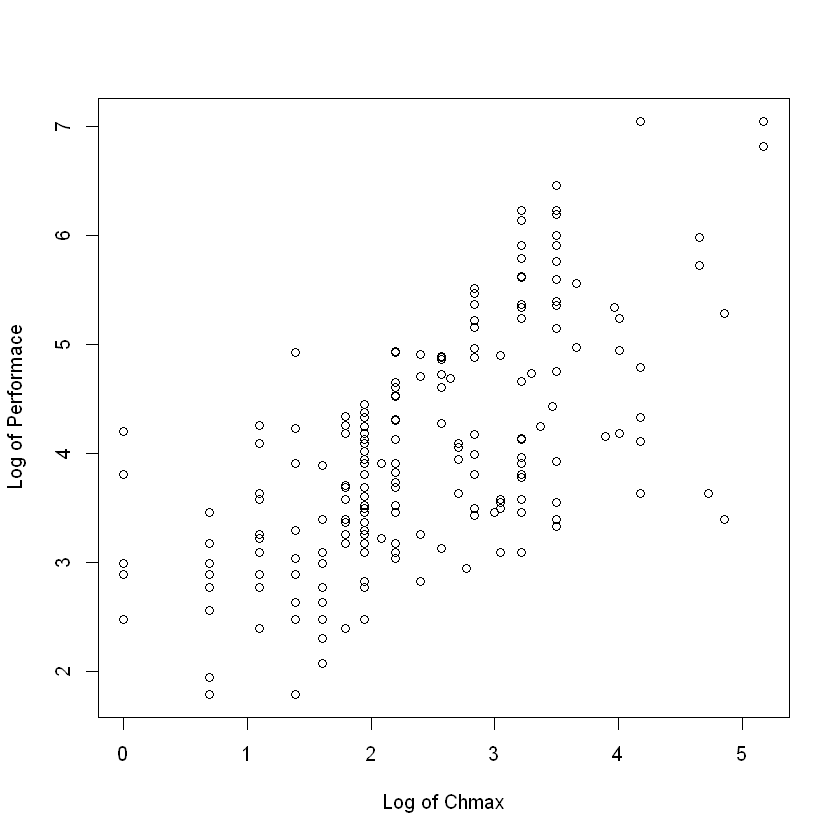

In [14]:
plot(log(data[,2]), log(data[,3]), xlab="Log of Chmax", ylab= "Log of Performace")

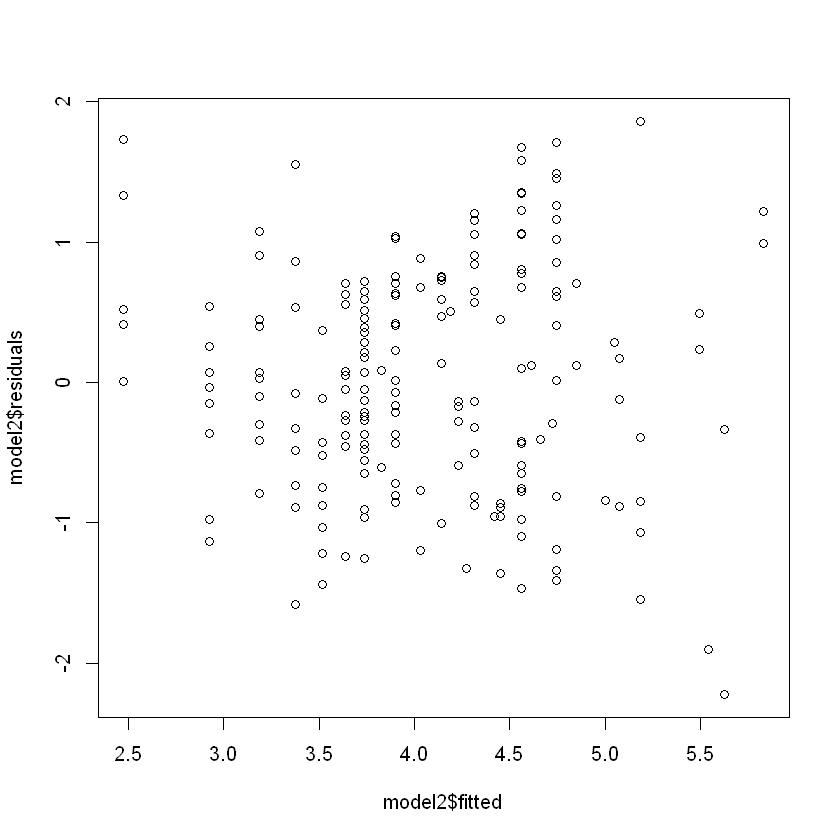

In [15]:
plot(model2$fitted, model2$residuals)

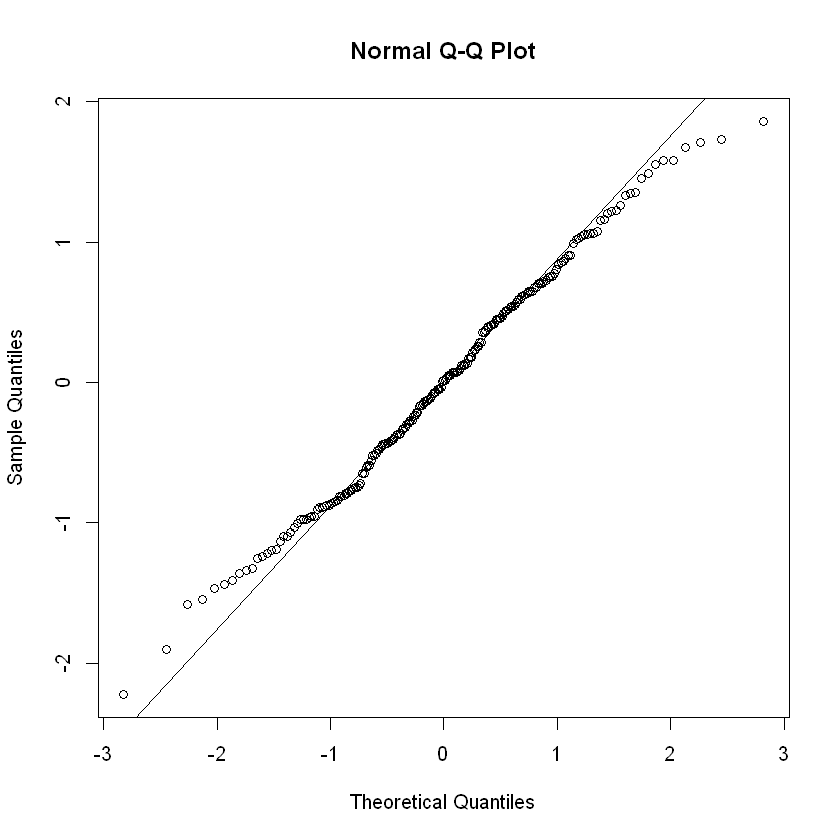

In [16]:
qqnorm(model2$residuals)
qqline(model2$residuals)

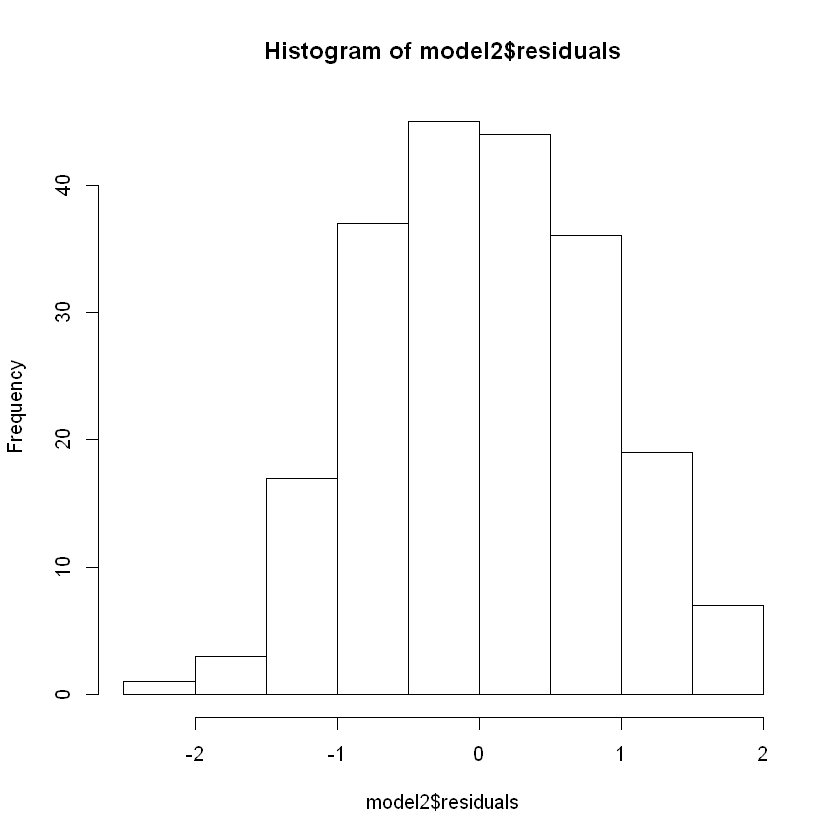

In [17]:
hist(model2$residuals)

Assumption:
Linearity: Linearity appears improved under transformed model.
Variance: Variance appears met with a much more randomly scattered plot
Normality: Distribution appears more normal from histogram and less tail deviation on the QQ plot

Based on all of the above, model2 appears to be a better fit than model1.

## Question B5: Prediction - 3 pts

Suppose we are interested in predicting CPU performance when `chmax = 128`.  Please make a prediction using both *model1* and *model2* and provide the 95% prediction interval of each prediction on the original scale of the response, *performance*. What observations can you make about the result in the context of the problem?

In [18]:
chmax = data.frame(chmax=128)
log_chmax = data.frame(chmax=log(128))
predict(model1,chmax,interval = "predict",level=0.95)
predict(model2,log_chmax,interval = "predict",level=0.95)

fit,lwr,upr
516.4685,252.2519,780.6851


fit,lwr,upr
3.500295,1.903049,5.09754


The models give stark differences in predictions. However, the wide variability in prediction range in model1 compared to model2 show that model2 is more accurate.

# Part C. ANOVA - 8 pts

We are going to continue using the CPU data set to analyse various vendors in the data set.  There are over 20 vendors in the data set.  To simplify the task, we are going to limit our analysis to three vendors, specifically, honeywell, hp, and nas.  The code to filter for those vendors is provided below.

In [19]:
# Filter for honeywell, hp, and nas
data2 = data[data$vendor %in% c("honeywell", "hp", "nas"), ]
data2$vendor = factor(data2$vendor)

1. **2 pts** Using `data2`, create a boxplot of *performance* and *vendor*, with *performance* on the vertical axis.  Interpret the plots.  

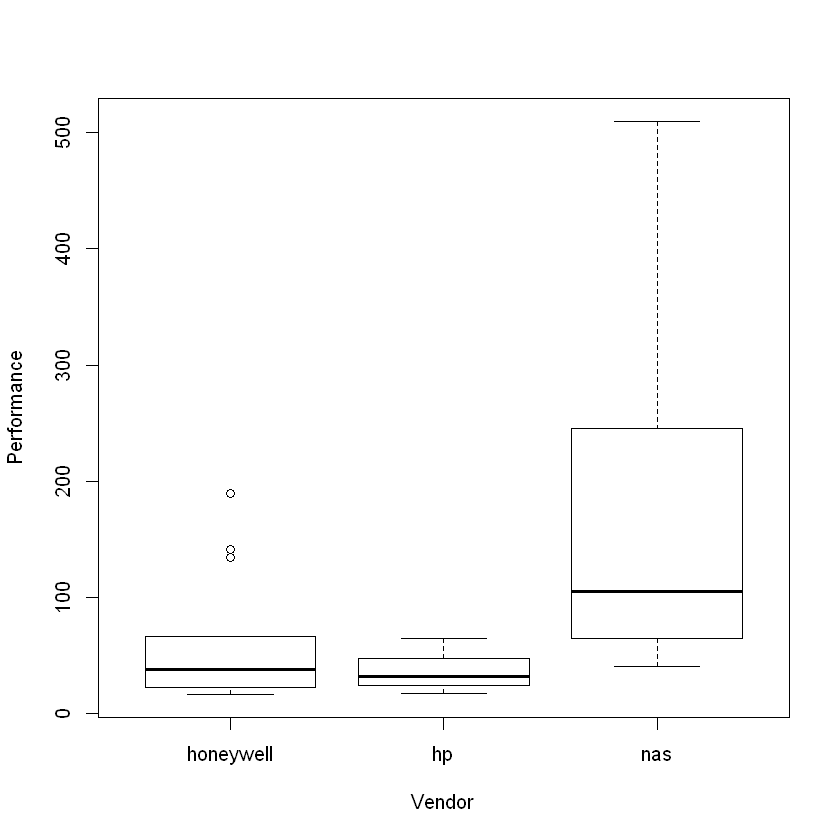

In [20]:
boxplot(data2$performance~data2$vendor, data = data2, xlab='Vendor', ylab = 'Performance')

Honeywell and Nas have higher median performance than hp, with honeywell having a couple outliers in performance. nas performs the best but has a much higher range in performance. HP is the worst performing, but also the most consistent in performance.

2. **3 pts** Perform an ANOVA F-test on the means of the three vendors.  Using an $\alpha$-level of 0.05, can we reject the null hypothesis that the means of the three vendors are equal?  Please interpret.

In [21]:
summary(aov(performance~vendor, data = data2))

            Df Sum Sq Mean Sq F value  Pr(>F)   
vendor       2 154494   77247   6.027 0.00553 **
Residuals   36 461443   12818                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p-value is less than 0.05, thus we reject the null hypothesis that the means of the three vendors are equal.

3. **3 pts** Perform a Tukey pairwise comparison between the three vendors. Using an $\alpha$-level of 0.05, which means are statistically significantly different from each other?

In [22]:
TukeyHSD(aov(performance~vendor, data = data2))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = performance ~ vendor, data = data2)

$vendor
                   diff        lwr      upr     p adj
hp-honeywell  -24.03297 -153.76761 105.7017 0.8934786
nas-honeywell 116.43320   16.82659 216.0398 0.0188830
nas-hp        140.46617   18.11095 262.8214 0.0214092


nas' mean is startistically significantly different from the other vendors.